In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [84]:
data = pd.read_csv('cleaned_data.csv')

In [85]:
unclean_data = pd.read_csv('athlete_events.csv')

In [4]:
mean_unclean = unclean_data.groupby('Year').mean()

In [7]:
mean_unclean.reset_index(inplace=True)

In [8]:
mean_unclean.head()

,Year,ID,Age,Height,Weight
0,1896,71099.757895,23.580645,172.739130,71.387755
1,1900,63681.200930,29.034031,176.637931,74.556962
2,1904,70258.328978,26.698150,175.788732,72.197279
3,1906,70696.454703,27.125253,178.206226,75.917073
4,1908,66412.000967,26.970228,177.543158,75.386128


## Age Over Time

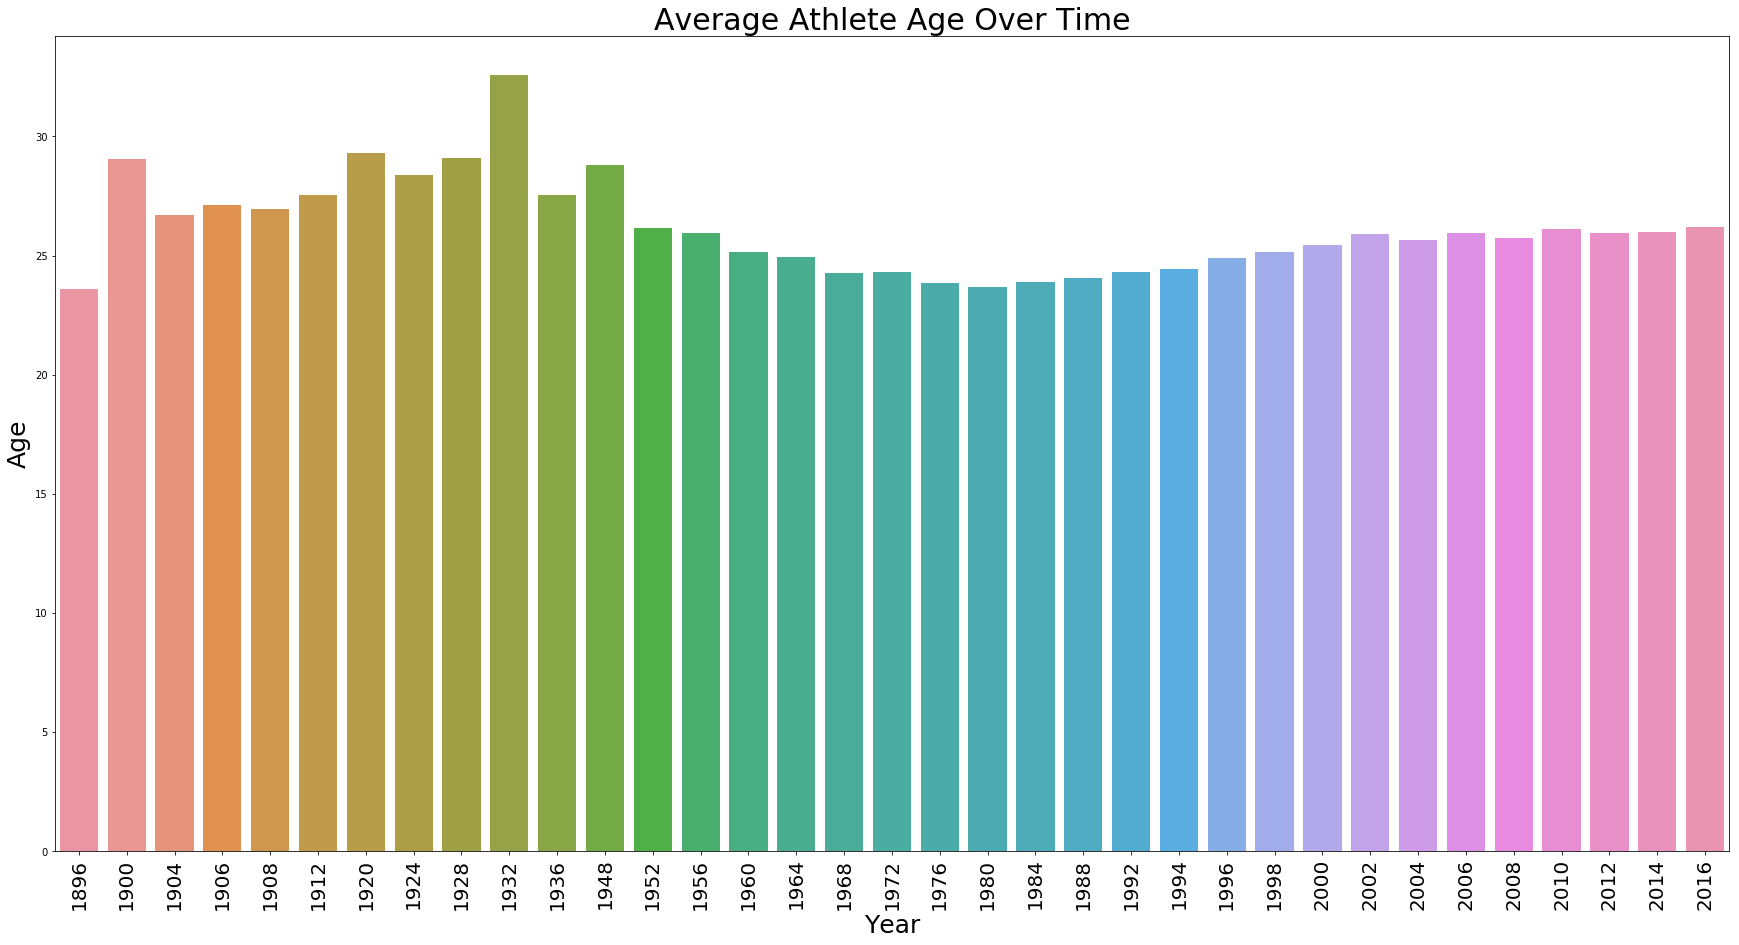

In [10]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(mean_unclean['Year'],mean_unclean['Age'],ci=False)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Age',size=25)
plt.title('Average Athlete Age Over Time',fontsize=30)
plt.show()

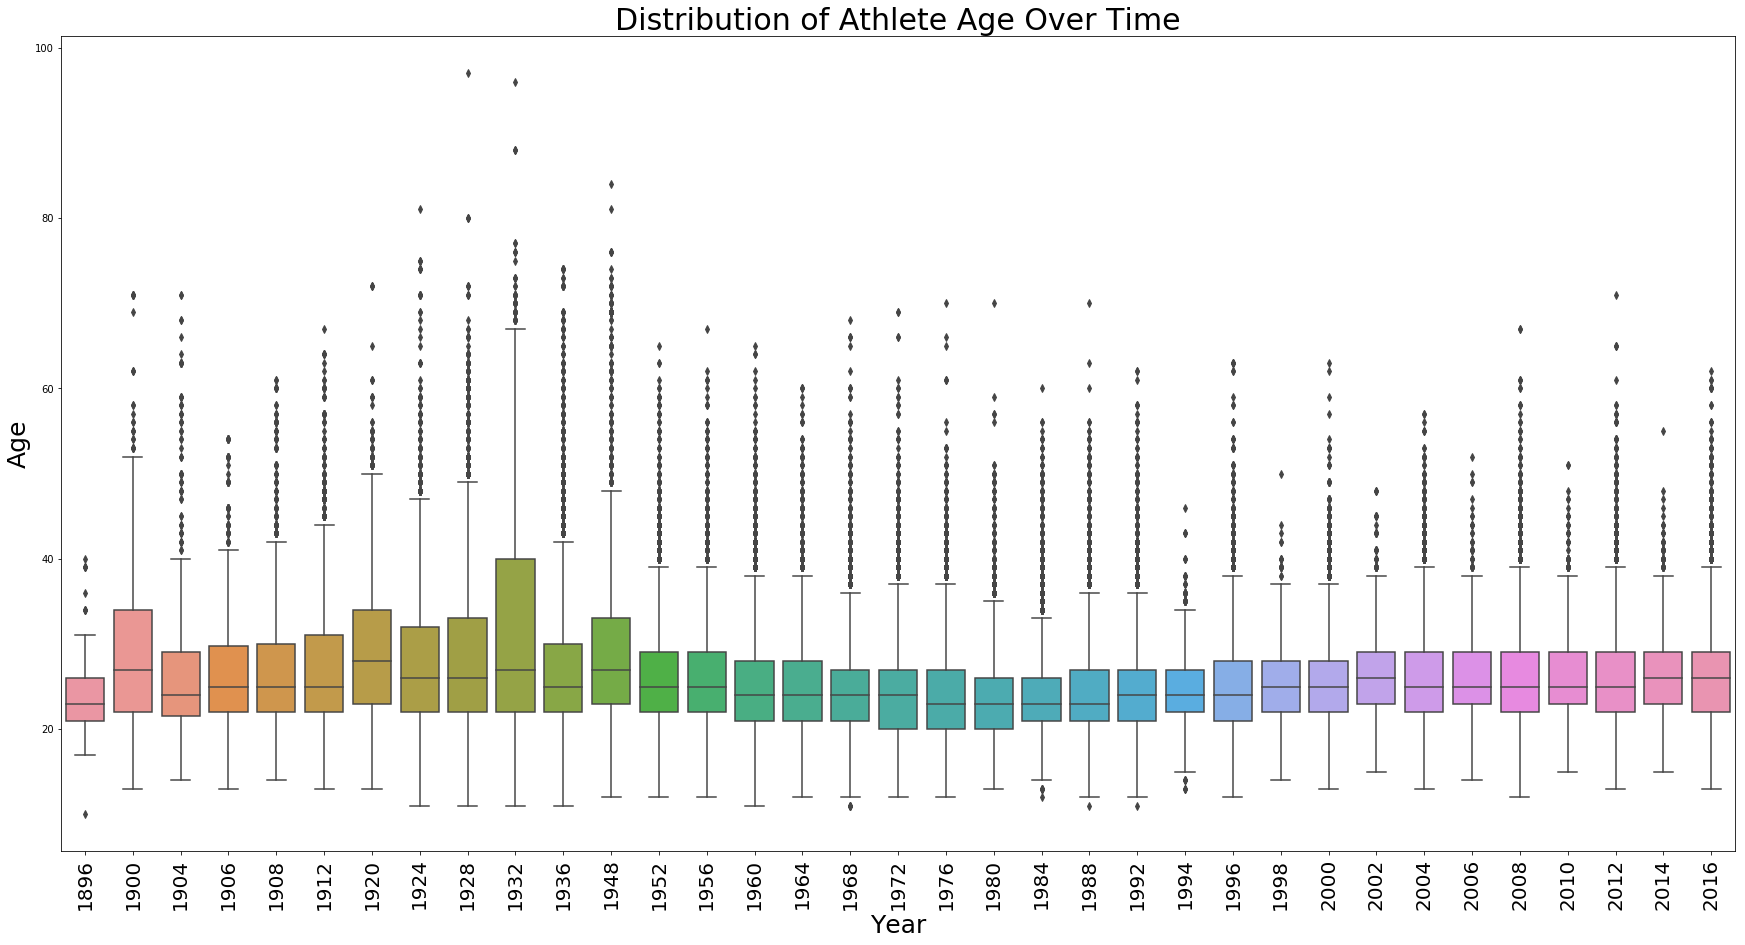

In [16]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Age',data=unclean_data)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Age',size=25)
plt.title('Distribution of Athlete Age Over Time',fontsize=30)
plt.show()

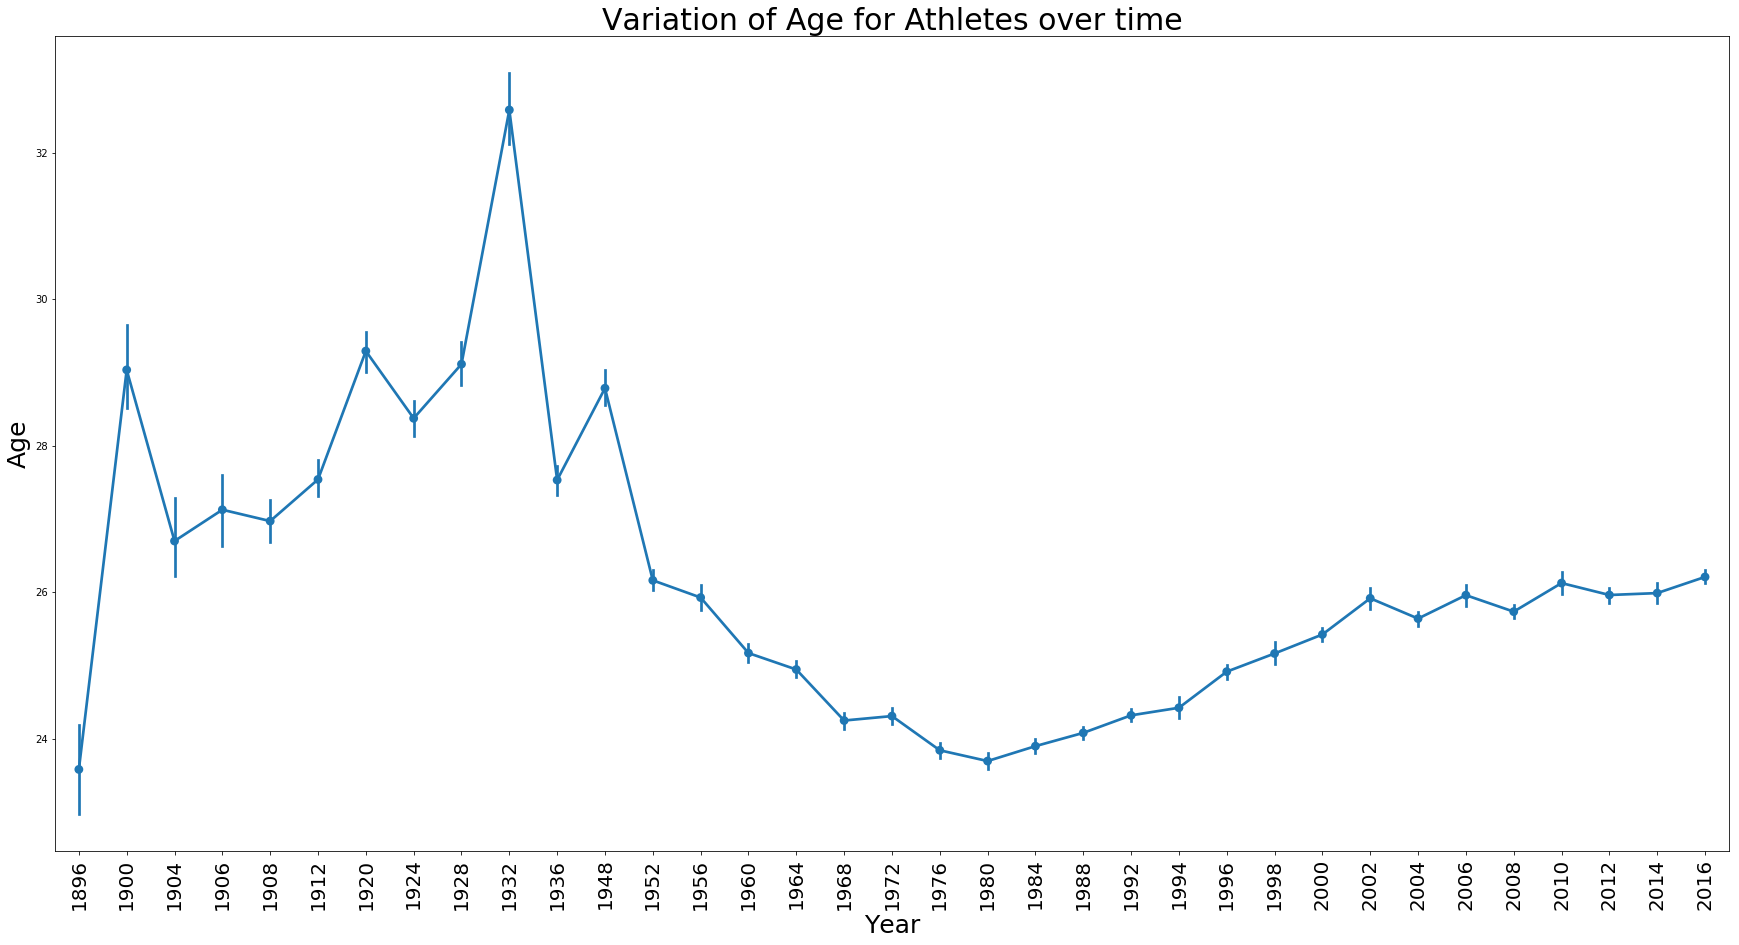

In [108]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Age', data=unclean_data)
plt.title('Variation of Age for Athletes over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Age',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

## Height Over Time

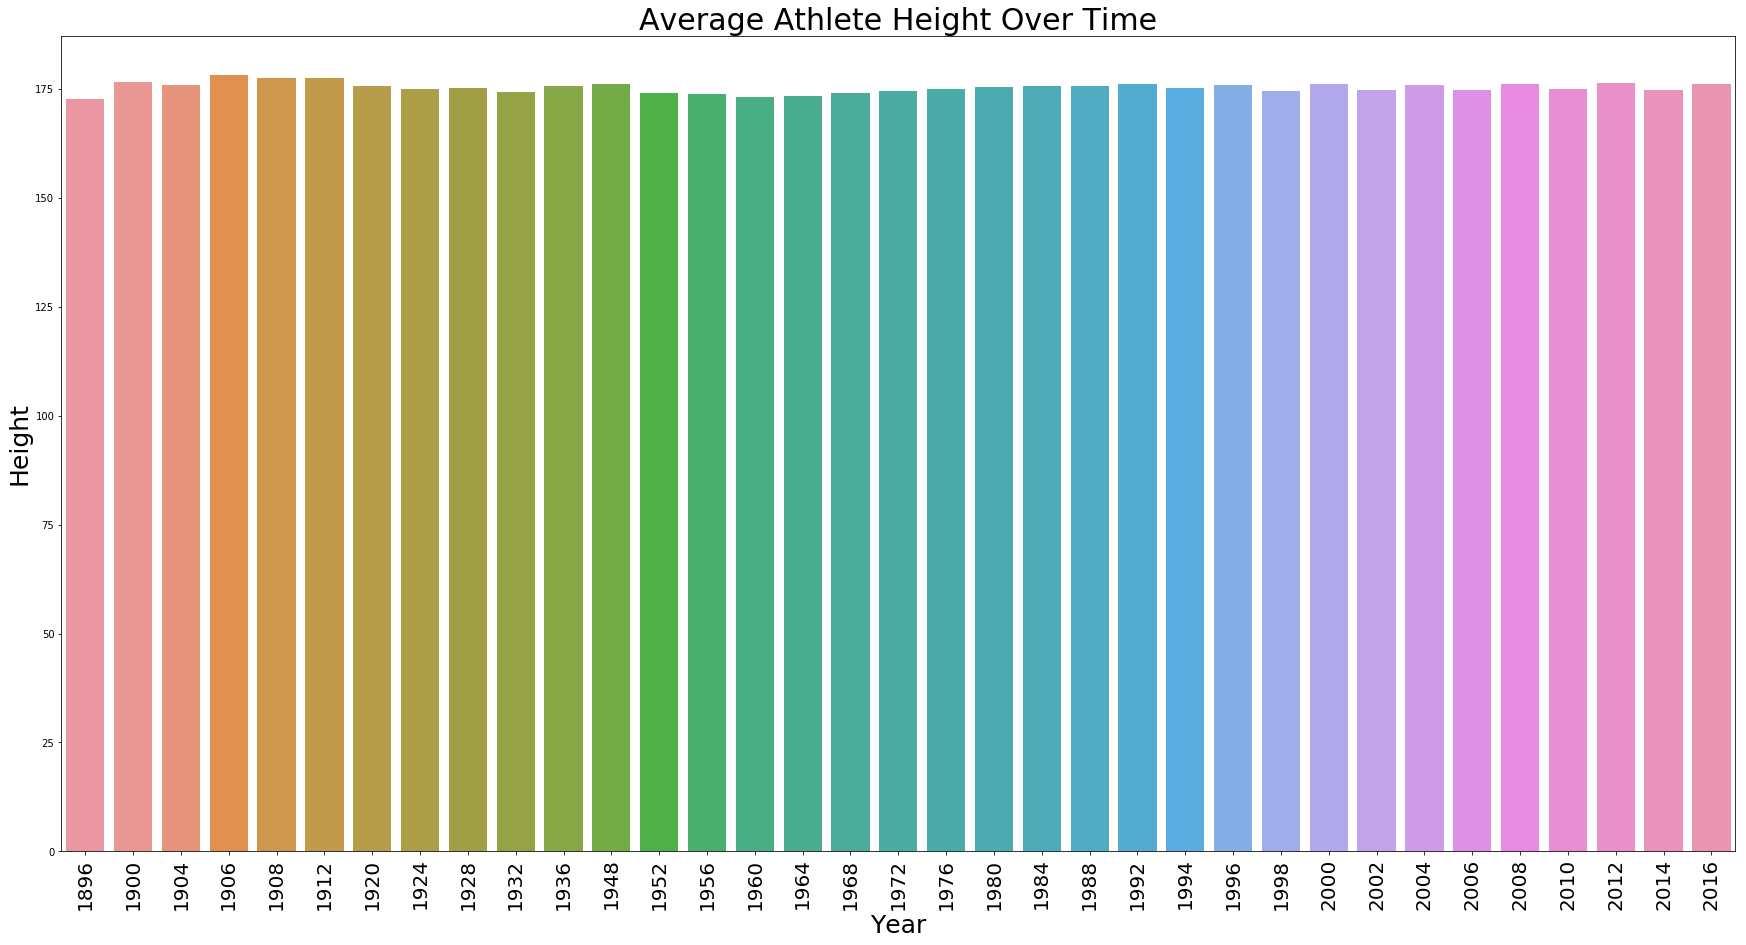

In [11]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(mean_unclean['Year'],mean_unclean['Height'],ci=False)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Height',size=25)
plt.title('Average Athlete Height Over Time',fontsize=30)
plt.show()

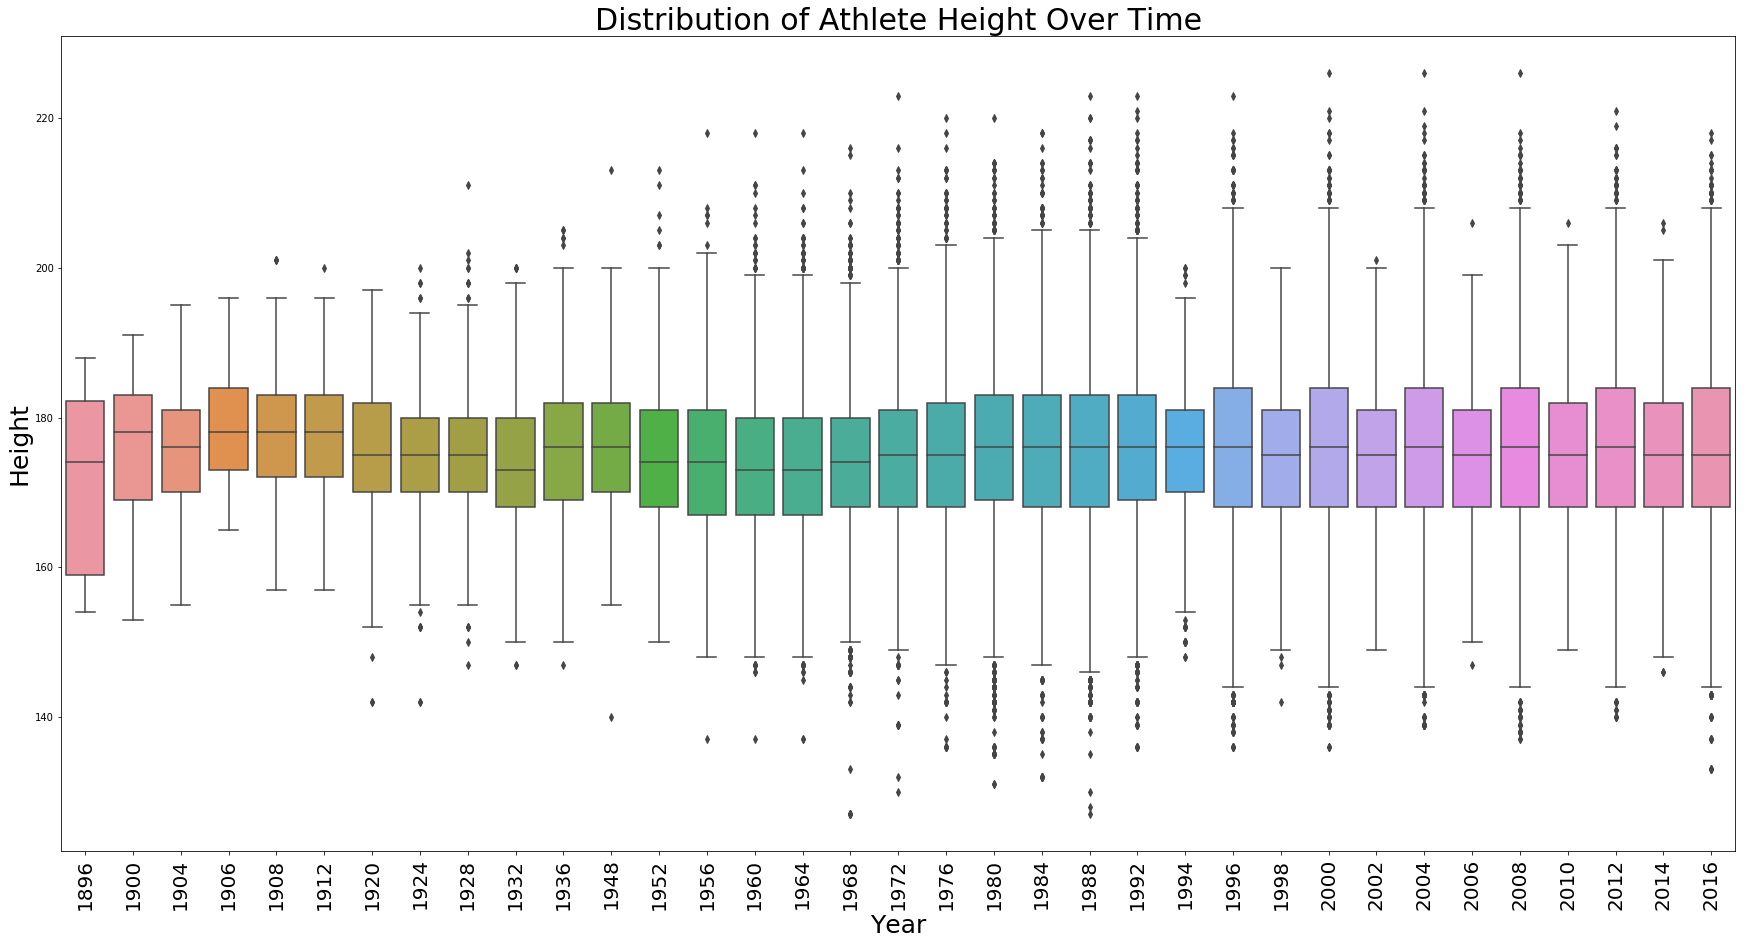

In [17]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Height',data=unclean_data)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Height',size=25)
plt.title('Distribution of Athlete Height Over Time',fontsize=30)
plt.show()

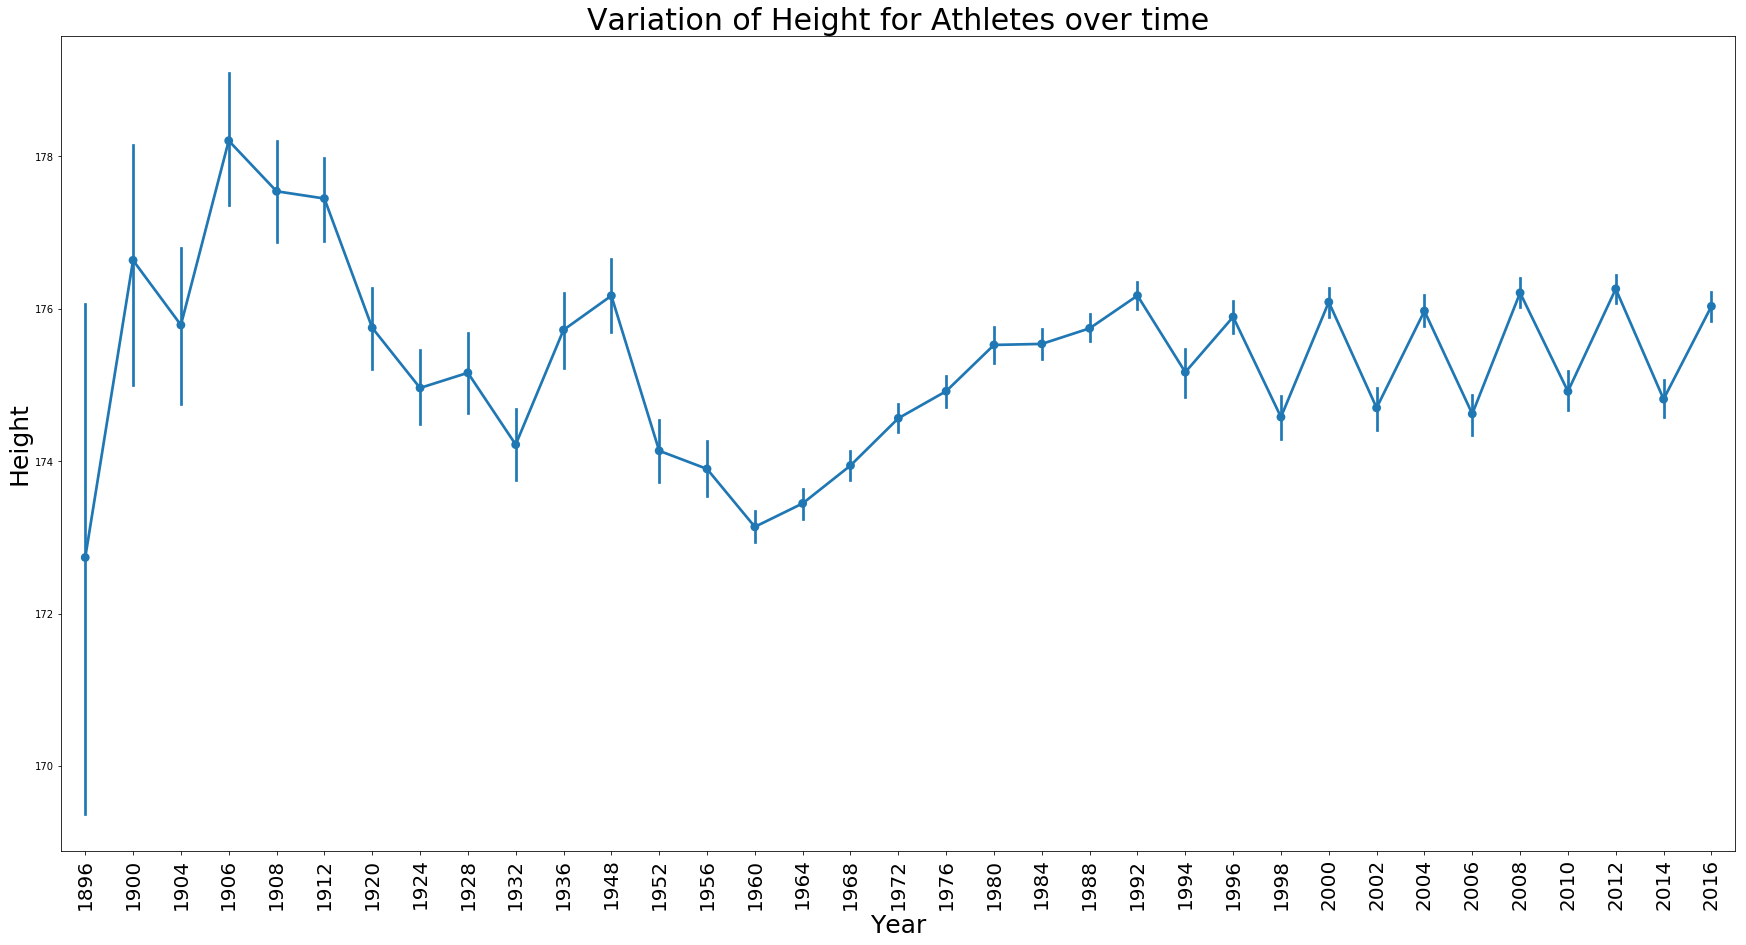

In [28]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Height', data=unclean_data)
plt.title('Variation of Height for Athletes over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Height',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

## Weight Over Time

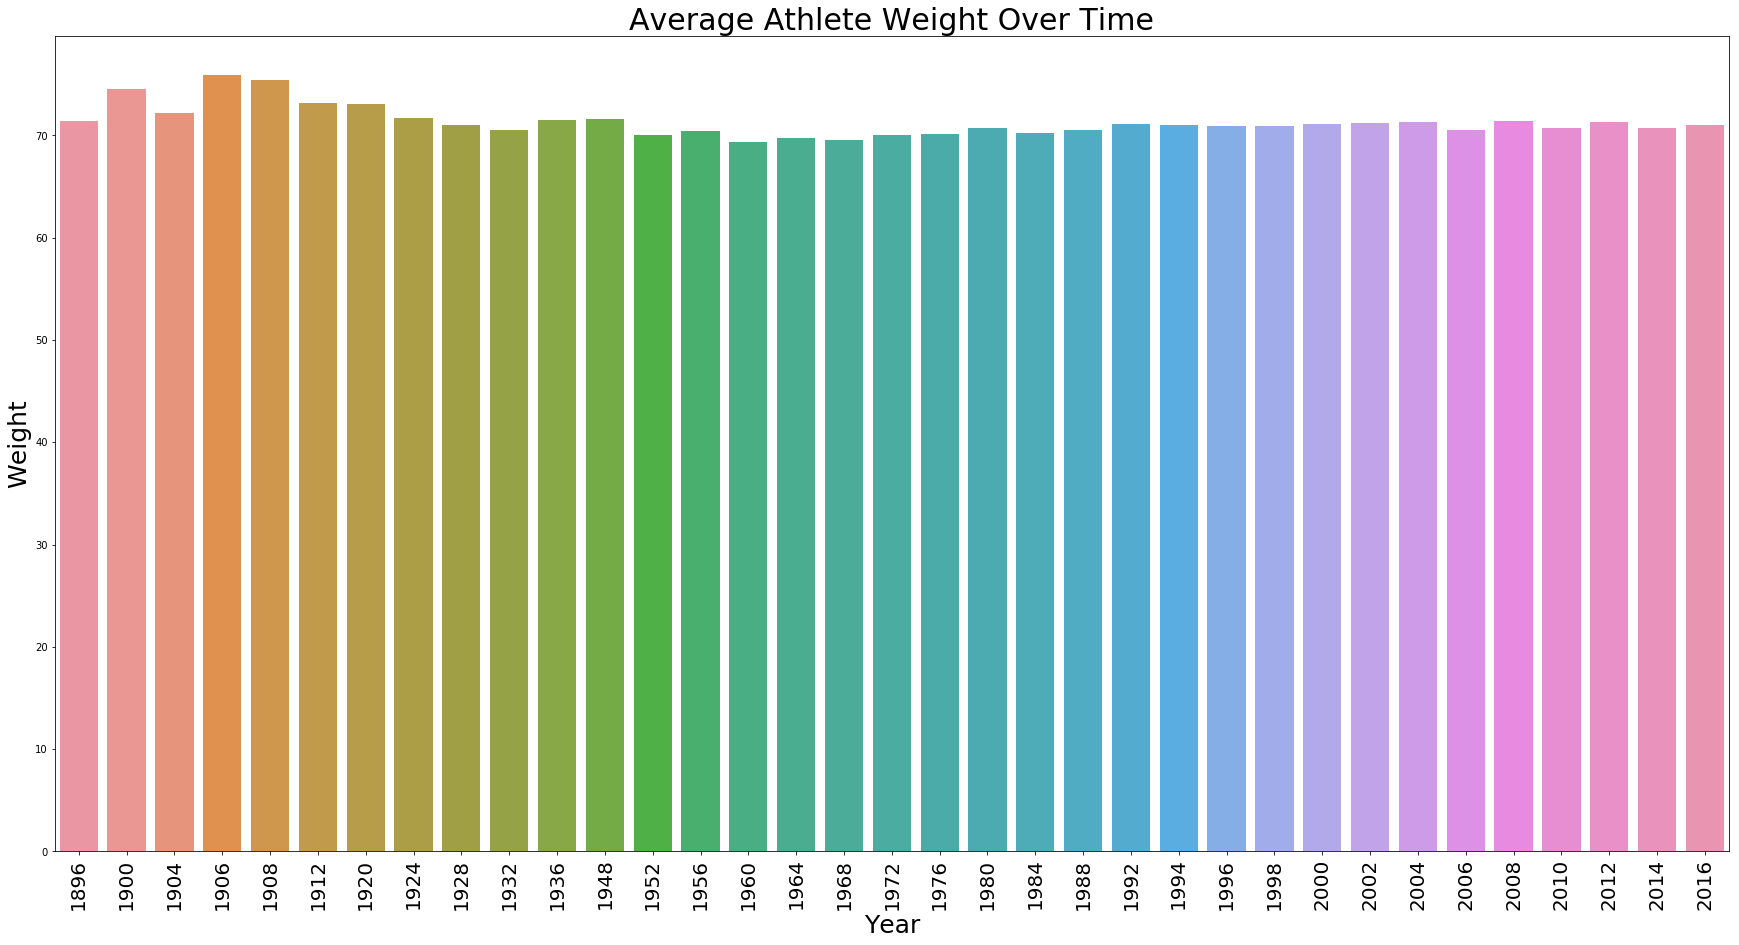

In [12]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(mean_unclean['Year'],mean_unclean['Weight'],ci=False)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Weight',size=25)
plt.title('Average Athlete Weight Over Time',fontsize=30)
plt.show()

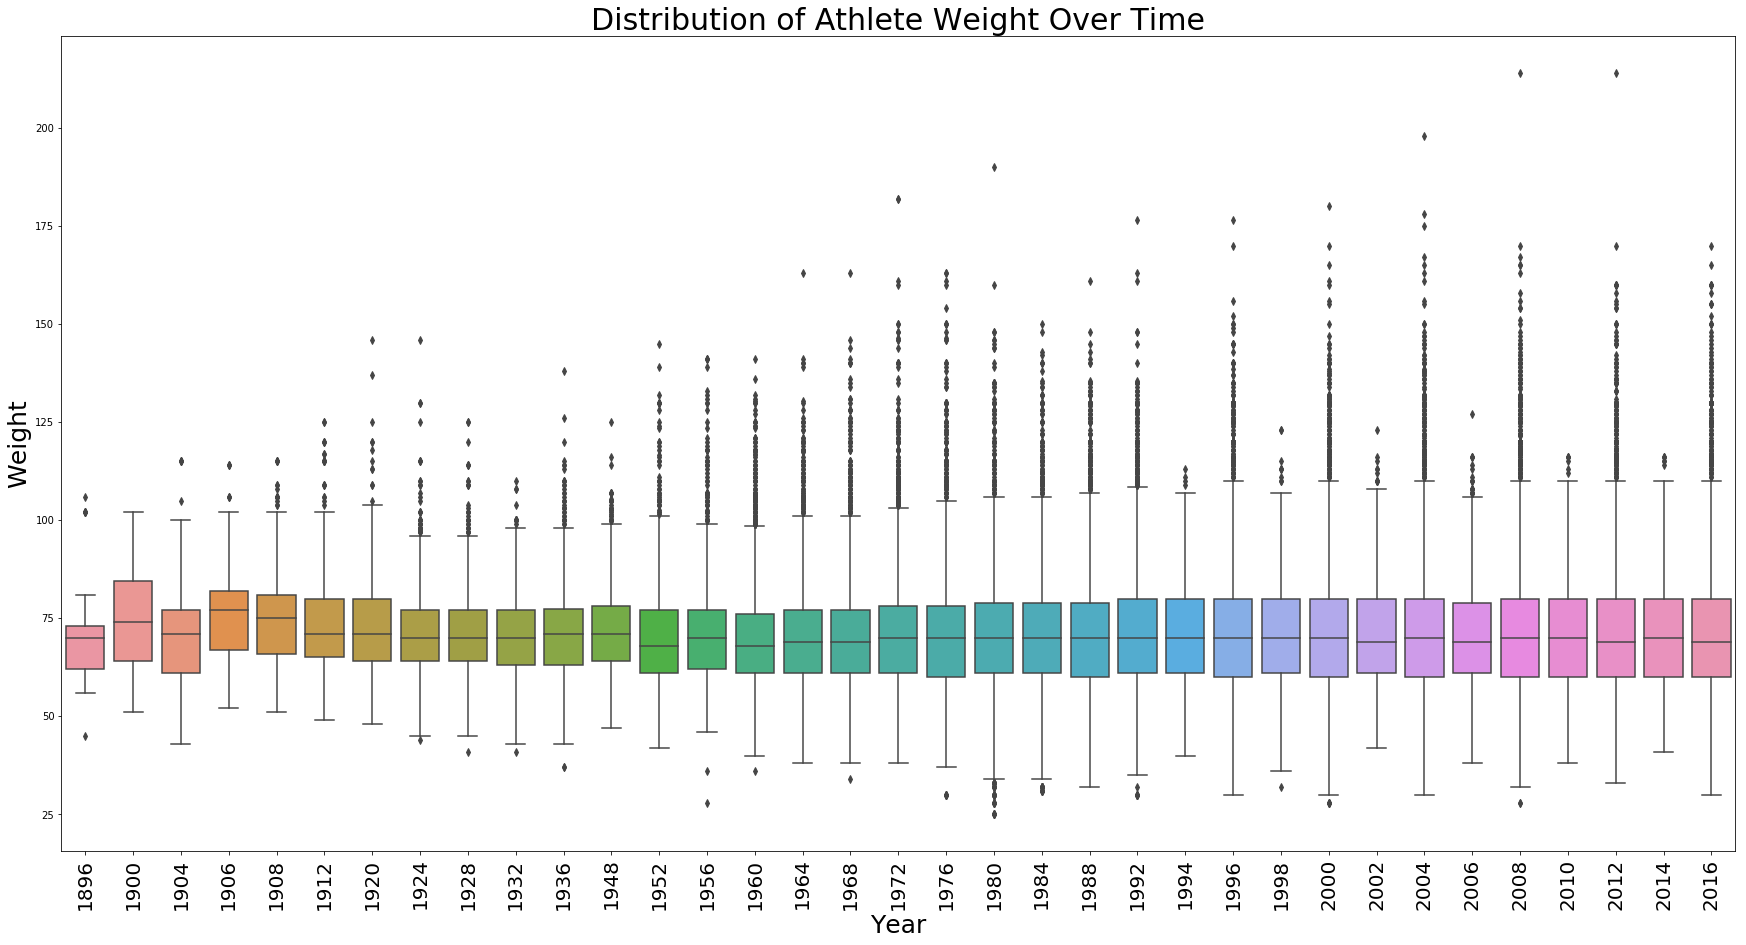

In [18]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Weight',data=unclean_data)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Weight',size=25)
plt.title('Distribution of Athlete Weight Over Time',fontsize=30)
plt.show()

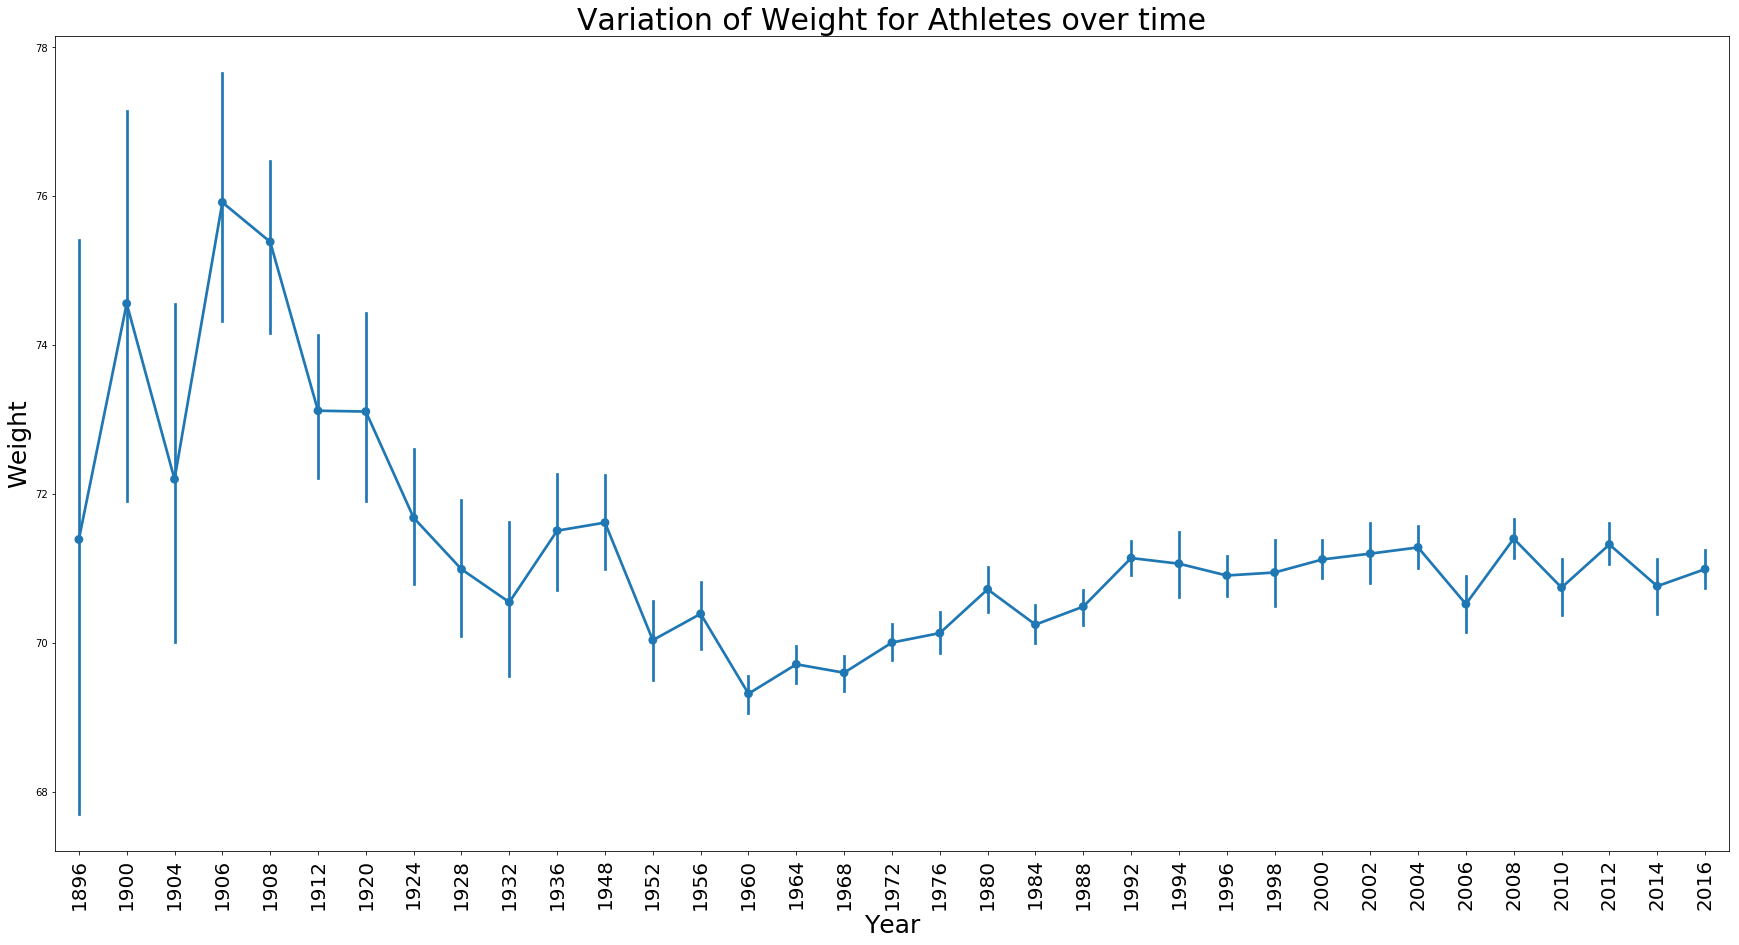

In [27]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Weight', data=unclean_data)
plt.title('Variation of Weight for Athletes over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Weight',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

## County Participation Over Time

In [35]:
unique_countries = pd.DataFrame(unclean_data.groupby('Year')['NOC'].nunique())
unique_countries.reset_index(inplace=True)
unique_countries.columns = ['Year','Count']

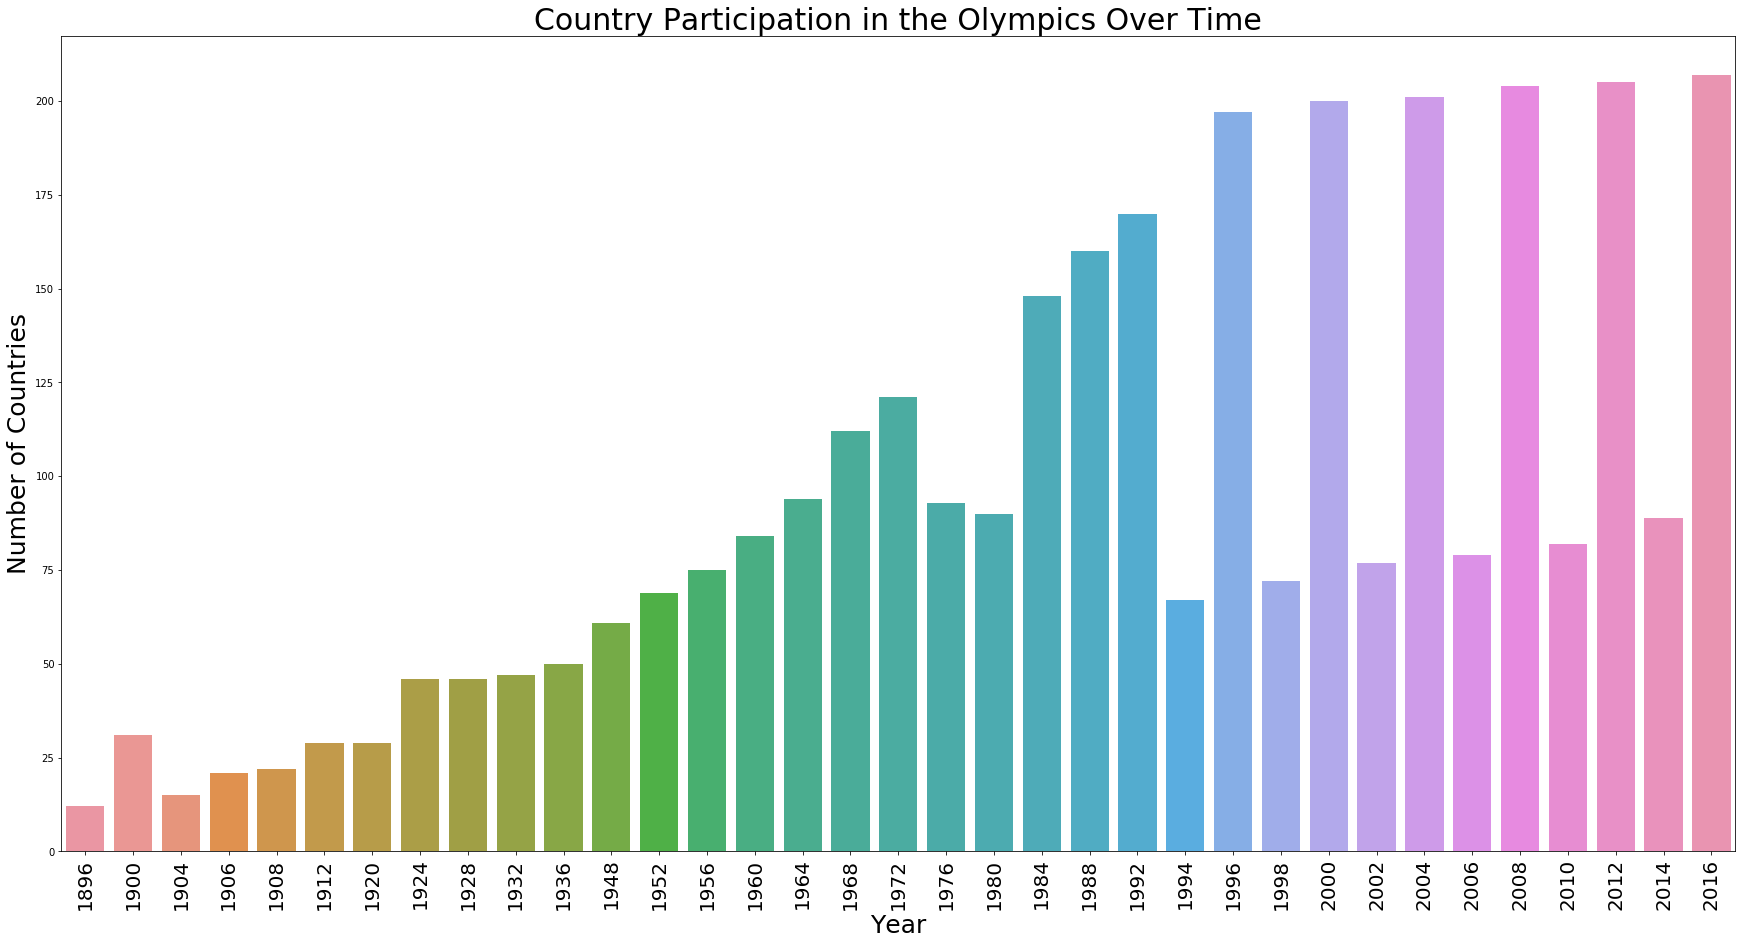

In [36]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(unique_countries['Year'],unique_countries['Count'],ci=False)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Number of Countries',size=25)
plt.title('Country Participation in the Olympics Over Time',fontsize=30)
plt.show()

In [94]:
country_data = pd.read_csv('noc_regions.csv')

In [97]:
country_participation = pd.merge(data,country_data,on='NOC',how='left')

In [98]:
country_participation.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN


In [102]:
participation_data = pd.DataFrame(country_participation.groupby('region')['Games'].nunique())
participation_data.reset_index(inplace=True)

In [103]:
participation_data.head()

,region,Games
0,Afghanistan,14
1,Albania,11
2,Algeria,16
3,American Samoa,9
4,Andorra,22


In [121]:
trace = go.Choropleth(
            locations = participation_data['region'],
            locationmode='country names',
            z = participation_data['Games'],
            text = participation_data['Games'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'portland',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Number of Games',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of Olympic Games Participated in by Each Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [110]:
participation_data.sort_values('Games',ascending=False,inplace=True)
to_graph = participation_data.head(15)

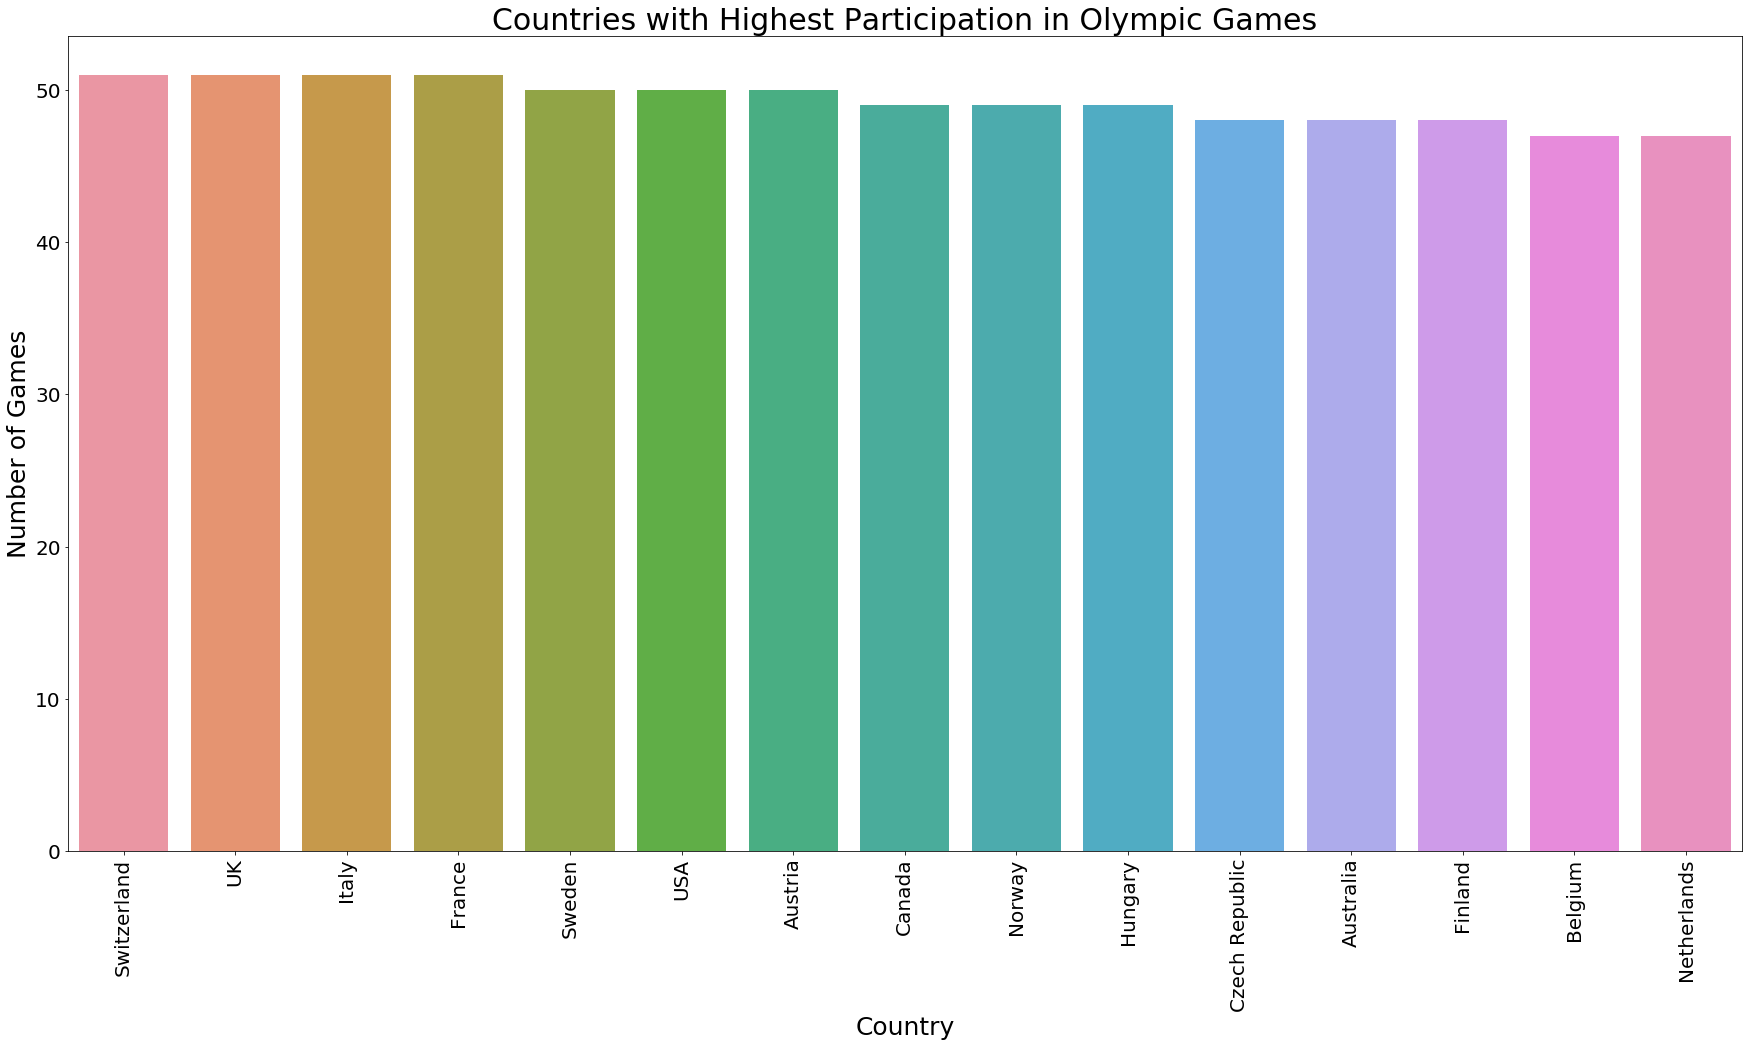

In [112]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph['region'],to_graph['Games'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.yticks(size=20)
plt.title("Countries with Highest Participation in Olympic Games",fontsize=30)
plt.ylabel("Number of Games",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

In [113]:
sparticipation_data = pd.DataFrame(country_participation[country_participation.Season=='Summer'].groupby('region')['Games'].nunique())
sparticipation_data.reset_index(inplace=True)

In [114]:
sparticipation_data.head()

,region,Games
0,Afghanistan,14
1,Albania,8
2,Algeria,13
3,American Samoa,8
4,Andorra,11


In [117]:
trace = go.Choropleth(
            locations = sparticipation_data['region'],
            locationmode='country names',
            z = sparticipation_data['Games'],
            text = sparticipation_data['Games'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'oranges',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Number of Games',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of Summer Olympic Games Participated in by Each Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [118]:
wparticipation_data = pd.DataFrame(country_participation[country_participation.Season=='Winter'].groupby('region')['Games'].nunique())
wparticipation_data.reset_index(inplace=True)

In [119]:
wparticipation_data.head()

,region,Games
0,Albania,3
1,Algeria,3
2,American Samoa,1
3,Andorra,11
4,Argentina,18


In [120]:
trace = go.Choropleth(
            locations = wparticipation_data['region'],
            locationmode='country names',
            z = wparticipation_data['Games'],
            text = wparticipation_data['Games'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'blues',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Number of Games',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of Winter Olympic Games Participated in by Each Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [37]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [87]:
host_cities = data.copy()[['Games','Year','Season','City']]

In [88]:
host_cities.head()

,Games,Year,Season,City
0,1992 Summer,1992,Summer,Barcelona
1,2012 Summer,2012,Summer,London
2,1920 Summer,1920,Summer,Antwerpen
3,1900 Summer,1900,Summer,Paris
4,1988 Winter,1988,Winter,Calgary


In [89]:
host_cities = host_cities.groupby(['Year','City','Season']).count()

In [90]:
host_cities.reset_index(inplace=True)

In [91]:
host_cities

,Year,City,Season,Games
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101
5,1912,Stockholm,Summer,4040
6,1920,Antwerpen,Summer,4292
7,1924,Chamonix,Winter,460
8,1924,Paris,Summer,5233
9,1928,Amsterdam,Summer,4992


In [92]:
summer_cities = host_cities[host_cities['Season']=='Summer']
winter_cities = host_cities[host_cities['Season']=='Winter']

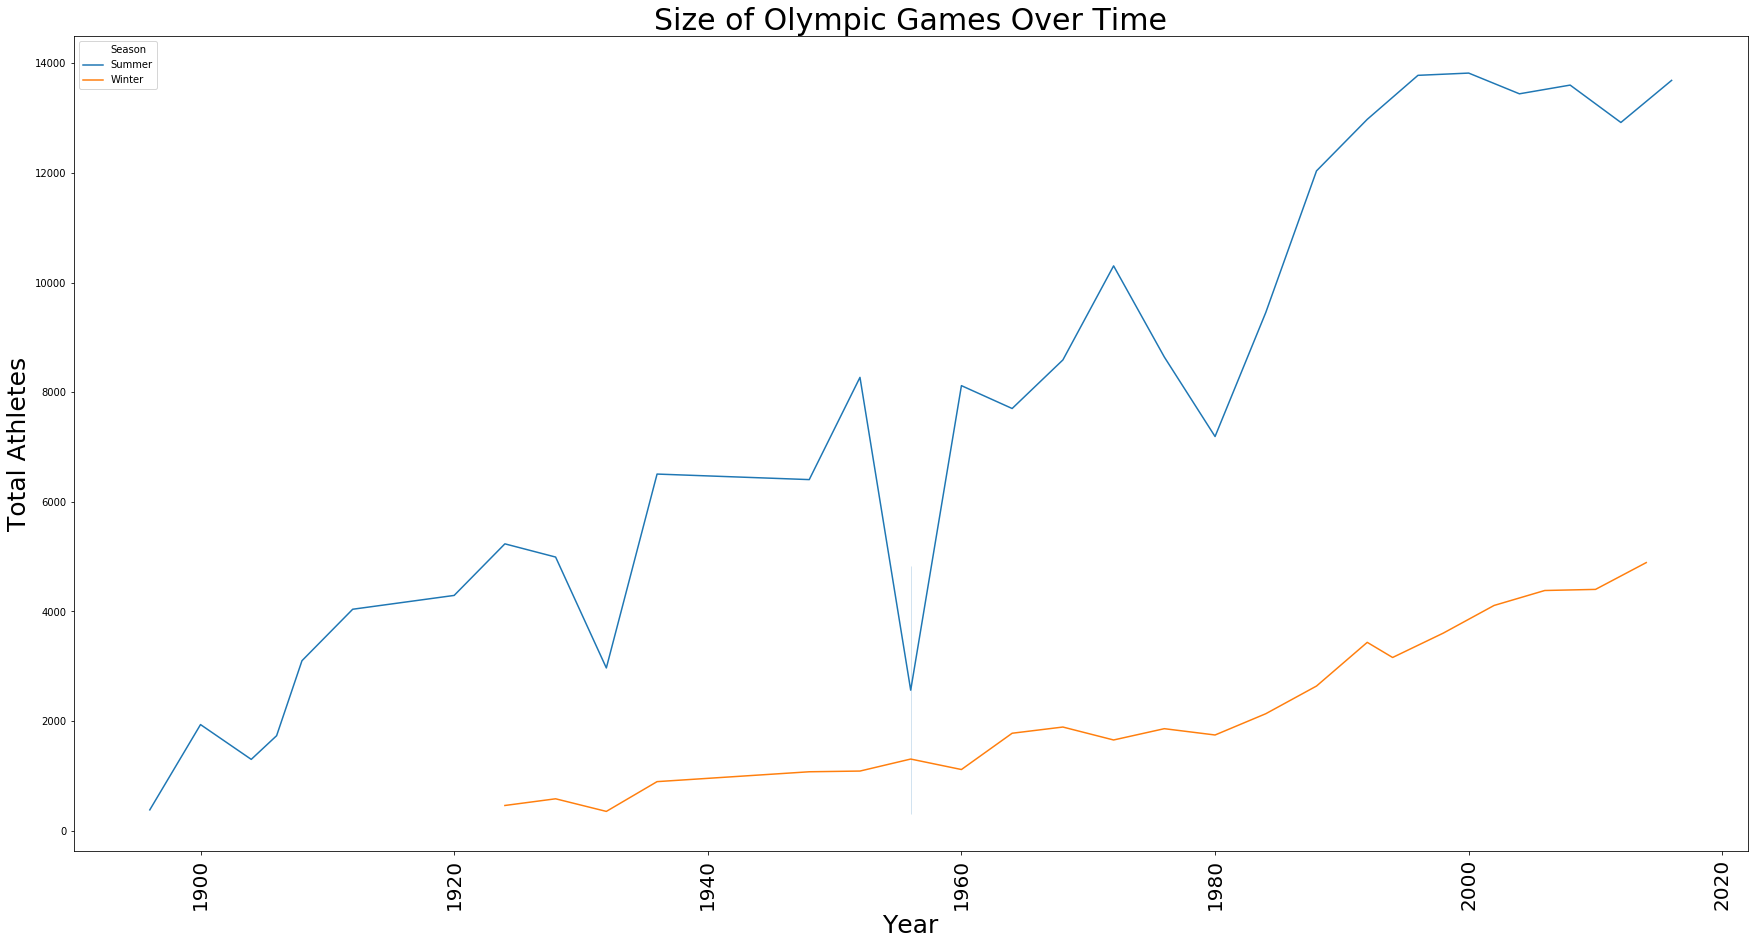

In [93]:
plt.figure(figsize=(30,15))
sns.lineplot(x="Year", y="Games", hue="Season",data=host_cities,markers=True)
plt.title('Size of Olympic Games Over Time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Total Athletes',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

In [60]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [64]:
trace = go.Choropleth(
            locations = host_cities['City'],
            locationmode='country names',
            z = host_cities['Games'],
            text = [host_cities['Season'],host_cities['Year']],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Size of Games',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Relative Size and Location of Olympic Games',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)